#**Assignment 3**

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import openml
from sklearn.model_selection import train_test_split

### Q1. Load the texture dataset from OpenML: [Dataset Link](https://www.openml.org/search?type=data&sort=version&status=any&order=asc&exact_name=texture&id=40499) (1 Mark)

In [76]:
dataset = openml.datasets.get_dataset('texture')
df, *_ = dataset.get_data()
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Class
0,-1.223,-0.798,-0.867,-0.639,-0.545,-0.412,-0.795,-0.629,-0.547,-0.868,...,-0.766,-0.555,-0.714,-0.545,-0.587,-0.871,-0.620,-0.568,-0.607,5
1,-1.410,-1.029,-1.013,-0.895,-0.762,-0.676,-1.043,-0.851,-0.775,-1.037,...,-0.919,-0.770,-0.847,-0.663,-0.723,-1.013,-0.748,-0.698,-0.817,5
2,-1.107,-0.649,-0.629,-0.492,-0.367,-0.298,-0.682,-0.478,-0.395,-0.681,...,-0.692,-0.445,-0.588,-0.371,-0.368,-0.746,-0.457,-0.379,-0.469,5
3,-1.270,-0.855,-0.958,-0.707,-0.619,-0.469,-0.872,-0.705,-0.620,-0.988,...,-0.829,-0.719,-0.774,-0.617,-0.688,-0.937,-0.693,-0.657,-0.779,5
4,-1.331,-0.862,-0.761,-0.689,-0.498,-0.361,-0.857,-0.600,-0.496,-0.779,...,-0.861,-0.571,-0.784,-0.545,-0.562,-0.952,-0.642,-0.578,-0.648,5


In [77]:
df.shape

(5500, 41)

###Q2. Show the class distribution of the dataset and state whether the dataset is well balanced or not. (2 Marks)

<Axes: xlabel='Class', ylabel='count'>

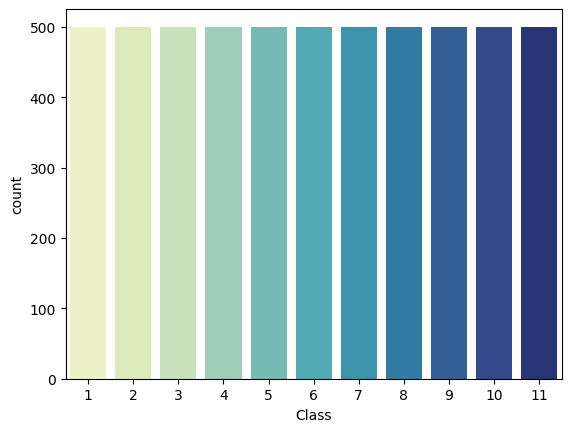

In [78]:
sns.countplot(data=df, x="Class", hue="Class", palette='YlGnBu')

In [79]:
df['Class'].value_counts() # All classes are well distributed. So, No need of SMOTE

,count
Class,
1,500
2,500
3,500
4,500
5,500
6,500
7,500
8,500
9,500


**YES THE DATASET IS WELL BALANCED**

###Q3. Split the dataset into training and test sets (80%-20%) (1 Marks)

In [80]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

###Q4. Scale the features of the dataset appropriately such that all the features take values in the same range.(2 Marks)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
X_train

array([[ 0.07093273,  1.18528044,  0.84692831, ...,  0.99374035,
         0.98260868,  0.82143443],
       [-0.62070511,  0.37065776, -0.20475734, ..., -0.42872928,
        -0.18638906, -0.10241777],
       [-0.87398094, -2.14150202, -1.77587309, ..., -1.60381288,
        -1.75004843, -1.49144907],
       ...,
       [-0.73760165, -2.13662404, -1.68288869, ..., -1.58002577,
        -1.77502701, -1.48819607],
       [-0.46971375, -0.80005748, -2.07085809, ..., -1.35642686,
        -1.54022832, -1.49144907],
       [-0.4940672 ,  0.39016968,  1.17077054, ...,  0.8415028 ,
         0.94763866,  0.97757847]])

In [83]:
y_train = y_train.squeeze()
y_test = y_test.squeeze()

###Q5. Design a Gaussian Naive Bayes’ (NB) classifier and fit it on the training set (6 Marks)

In [95]:
class GaussianNaiveBayesClassifier:
  def __init__(self):
    self.classes = None
    self.mean = None
    self.var = None
    self.prior = None

  def fit(self, X, y):
    self.classes = np.unique(y)
    num_classes = len(self.classes)
    num_features = X.shape[1]

    self.mean = np.zeros((num_classes, num_features))
    self.var = np.zeros((num_classes, num_features))
    self.prior = np.zeros(num_classes)

    for idx, c in enumerate(self.classes):
      X_c = X[y==c]
      self.mean[idx, :] = X_c.mean(axis=0)
      self.var[idx, :] = X_c.var(axis=0)
      self.prior[idx] = X_c.shape[0] / float(X.shape[0])

  def predict(self, X):
    y_pred = [self._predict(x) for x in X]
    return np.array(y_pred)

  def _predict(self, x):
    posteriors = []

    for idx, c in enumerate(self.classes):
      prior = np.log(self.prior[idx])
      posterior = np.sum(np.log(self._ProbabilityDistributionFunction(idx, x)))
      posterior = prior + posterior
      posteriors.append(posterior)

    return self.classes[np.argmax(posteriors)]

  def _ProbabilityDistributionFunction(self, class_idx, x):
    mean = self.mean[class_idx, :]
    var = self.var[class_idx, :]
    numerator = np.exp(- (x - mean)**2 / (2 * var))
    denominator = np.sqrt(2 * np.pi * var)
    return numerator / denominator

In [96]:
gnb_classifier = GaussianNaiveBayesClassifier()
gnb_classifier.fit(X_train, y_train)

###Q6. Evaluate the test set using the Gaussian NB classifier you learned from the training data and report the performance in terms of accuracy, precision, recall and confusion matrix. (2 Marks)

Custom Gaussian NB Classifier:
Accuracy: 0.7891
Precision: 0.7870
Recall: 0.7891


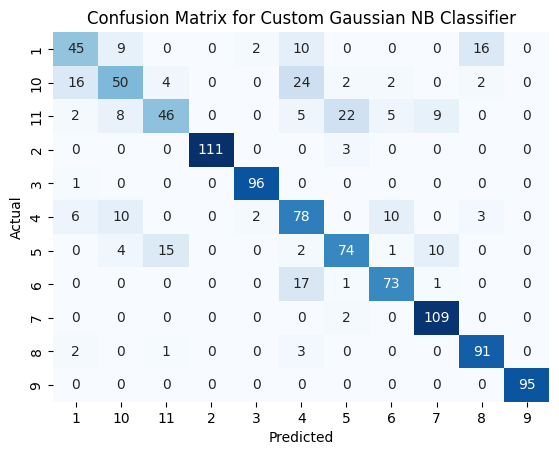

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = gnb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Custom Gaussian NB Classifier:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=gnb_classifier.classes, yticklabels=gnb_classifier.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Custom Gaussian NB Classifier')
plt.show()

###Q7. Using scikit-learn's implementation of Gaussian NB classifier, fit the training data. (4 Marks)

In [98]:
from sklearn.naive_bayes import GaussianNB

sklearn_gnb = GaussianNB()
sklearn_gnb.fit(X_train, y_train)

GaussianNB()

### Q8. Evaluate the scikit-learn's Gaussian NB model on the test set. How does the performance of this model compare with your custom implementation? (2 Marks)

Performance Metrics for scikit-learn Gaussian NB Classifier:
Accuracy: 0.7891
Precision: 0.7870
Recall: 0.7891


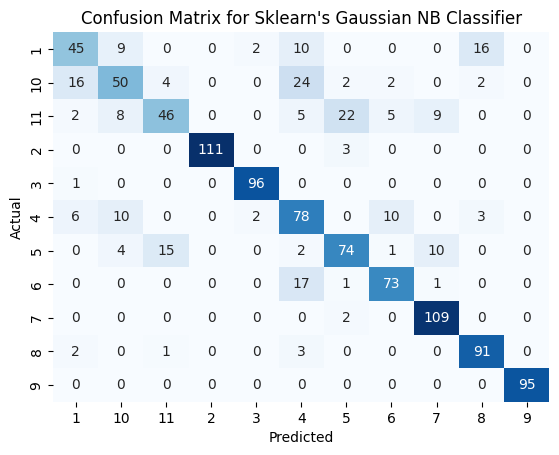

In [99]:
y_pred_sklearn = sklearn_gnb.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn, average='weighted')
recall_sklearn = recall_score(y_test, y_pred_sklearn, average='weighted')
conf_matrix_sklearn = confusion_matrix(y_test, y_pred_sklearn)

class_names = [str(cls) for cls in sklearn_gnb.classes_]

print("Performance Metrics for scikit-learn Gaussian NB Classifier:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")
sns.heatmap(conf_matrix_sklearn, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for Sklearn's Gaussian NB Classifier")
plt.show()

**Comparision :**  
Since, the Confusion Matrix of both Implementations are identical,  
Therefore, their performance is also identical.